# **Multi-Criteria ABC-XYZ Analysis for Inventory Segmentation**
* Source Data:https://www.kaggle.com/datasets/hikne707/online-retail/code

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install inventorize3

  Preparing metadata (setup.py) ... done
  Created wheel for inventorize3: filename=inventorize3-0.0.1-py3-none-any.whl size=15574 sha256=223e80bf0295b817ab1547d26d81f9de3466e8bf7d5e5e2c1e1a4a3e0d9e1163
  Stored in directory: /root/.cache/pip/wheels/1f/68/05/389c52c15bf1305e1d018692bddcc2e64b23130fbd4b2d2e15
Successfully built inventorize3


We use Inventorize (or inventory management tools like it) to efficiently track, manage, and control stock levels in a business.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("Retail store.xlsx")

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


<Axes: >

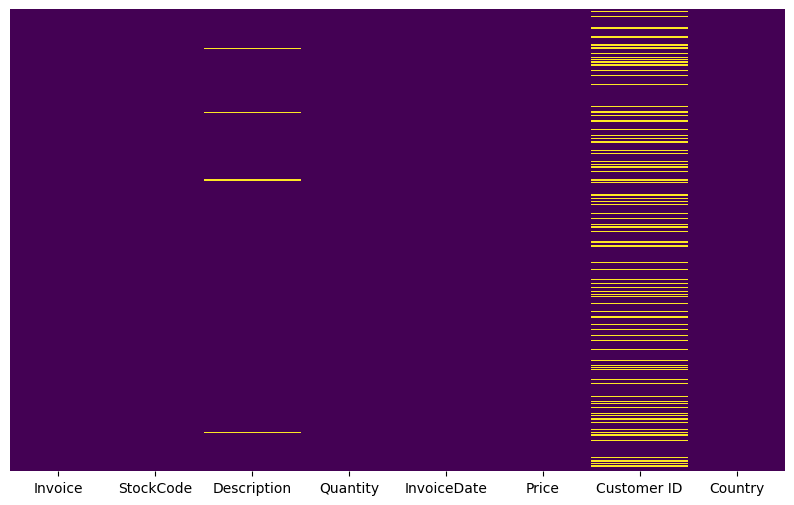

In [ ]:
# show the heatmap for null values in data set

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Fill null values with the mean for numerical columns
for col in df.select_dtypes(include=np.number):
  df[col] = df[col].fillna(df[col].mean())

In [ ]:
# Drop rows with missing values in the 'Description' column
df.dropna(subset=['Description'], inplace=True)

<Axes: >

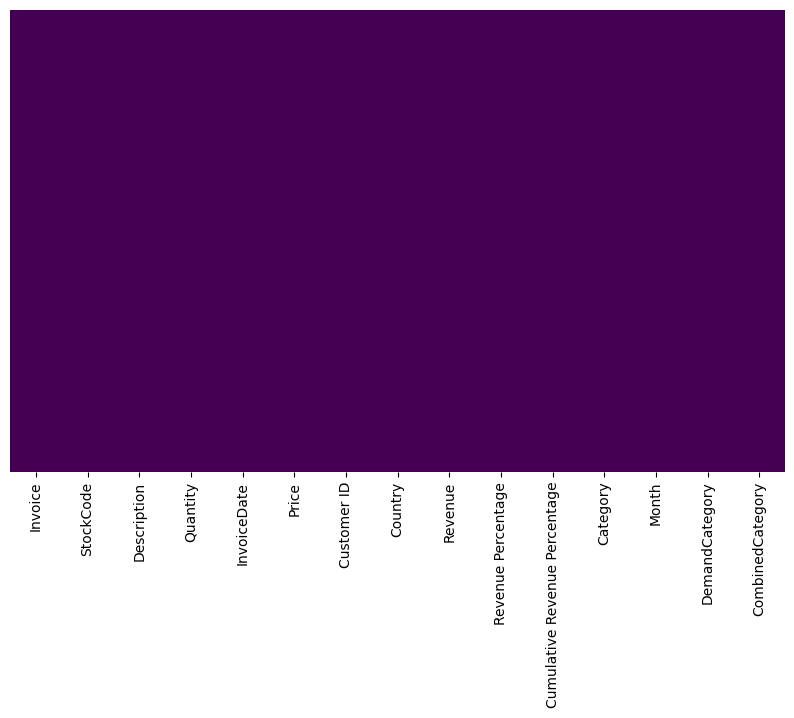

In [ ]:
# show the heatmap for missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Create a new column for revenue
df['Revenue'] = df['Quantity'] * df['Price']
# Show first few rows
print(df[['Invoice', 'StockCode', 'Quantity', 'Price', 'Revenue']].head())

  Invoice StockCode  Quantity  Price  Revenue
0  489434     85048        12   6.95     83.4
1  489434    79323P        12   6.75     81.0
2  489434    79323W        12   6.75     81.0
3  489434     22041        48   2.10    100.8
4  489434     21232        24   1.25     30.0


In [ ]:
# Lets summarize the data for SKU's ( Per SKU Total Quantity & Total Revenue)
summaized_data= df.groupby(['StockCode','Description']).agg(Quantity=('Quantity',np.sum),Revenue=('Revenue',np.sum)).reset_index() # Changed 'data_abc' to 'df'
summaized_data.head()

<ipython-input-11-4727be7e3890>:2: FutureWarning: The provided callable <function sum at 0x7d7684f0cea0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summaized_data= df.groupby(['StockCode','Description']).agg(Quantity=('Quantity',np.sum),Revenue=('Revenue',np.sum)).reset_index() # Changed 'data_abc' to 'df'
<ipython-input-11-4727be7e3890>:2: FutureWarning: The provided callable <function sum at 0x7d7684f0cea0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summaized_data= df.groupby(['StockCode','Description']).agg(Quantity=('Quantity',np.sum),Revenue=('Revenue',np.sum)).reset_index() # Changed 'data_abc' to 'df'


,StockCode,Description,Quantity,Revenue
0,10002,INFLATABLE POLITICAL GLOBE,6753,5454.46
1,10080,GROOVY CACTUS INFLATABLE,12,10.20
2,10109,BENDY COLOUR PENCILS,4,1.68
3,10120,DOGGY RUBBER,457,99.27
4,10120,Zebra invcing error,-9000,0.00


# **ABC ANALYSIS**
ABC analysis is used to assist decision-makers in inventory management and supply chain management.

A:-includes the most important items or customers that bring in the most sales or revenue.

B:-includes fairly important items or customers that contribute a moderate amount to sales or revenue.

C:-includes less important items or customers that contribute only a small part to total sales or revenue.

In [ ]:
# prompt: calculate the total revenue

total_revenue = df['Revenue'].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 9539484.634


In [ ]:
# Calculate the percentage of total revenue for each product
df['Revenue Percentage'] = (df['Revenue'] / total_revenue) * 100

# Display the results
print(df[['Description', 'Revenue', 'Revenue Percentage']].head())

                           Description  Revenue  Revenue Percentage
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS     83.4            0.000874
1                   PINK CHERRY LIGHTS     81.0            0.000849
2                  WHITE CHERRY LIGHTS     81.0            0.000849
3         RECORD FRAME 7" SINGLE SIZE     100.8            0.001057
4       STRAWBERRY CERAMIC TRINKET BOX     30.0            0.000314


In [ ]:
# Calculate cumulative revenue percentage
df['Cumulative Revenue Percentage'] = df['Revenue Percentage'].cumsum()

# Display the results
print(df[['Description', 'Revenue', 'Revenue Percentage', 'Cumulative Revenue Percentage']].head())
print(df.tail())

                           Description  Revenue  Revenue Percentage  \
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS     83.4            0.000874   
1                   PINK CHERRY LIGHTS     81.0            0.000849   
2                  WHITE CHERRY LIGHTS     81.0            0.000849   
3         RECORD FRAME 7" SINGLE SIZE     100.8            0.001057   
4       STRAWBERRY CERAMIC TRINKET BOX     30.0            0.000314   

   Cumulative Revenue Percentage  
0                       0.000874  
1                       0.001723  
2                       0.002572  
3                       0.003629  
4                       0.003944  
       Invoice StockCode                         Description  Quantity  \
525456  538171     22271                FELTCRAFT DOLL ROSIE         2   
525457  538171     22750        FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751      FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970  PINK FLORAL FELTCRAFT SHOULDER BAG       

In [ ]:
# Define thresholds for A, B, and C categories
a_threshold = 80
b_threshold = 95

# Create a new column 'Category' based on cumulative revenue percentage
df['Category'] = 'C'  # Initialize all products to category C
df.loc[df['Cumulative Revenue Percentage'] <= a_threshold, 'Category'] = 'A'
df.loc[(df['Cumulative Revenue Percentage'] > a_threshold) & (df['Cumulative Revenue Percentage'] <= b_threshold), 'Category'] = 'B'

# Display the results
print(df[['Description', 'Revenue', 'Revenue Percentage', 'Cumulative Revenue Percentage', 'Category']].head())
print(df.tail())

                           Description  Revenue  Revenue Percentage  \
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS     83.4            0.000874   
1                   PINK CHERRY LIGHTS     81.0            0.000849   
2                  WHITE CHERRY LIGHTS     81.0            0.000849   
3         RECORD FRAME 7" SINGLE SIZE     100.8            0.001057   
4       STRAWBERRY CERAMIC TRINKET BOX     30.0            0.000314   

   Cumulative Revenue Percentage Category  
0                       0.000874        A  
1                       0.001723        A  
2                       0.002572        A  
3                       0.003629        A  
4                       0.003944        A  
       Invoice StockCode                         Description  Quantity  \
525456  538171     22271                FELTCRAFT DOLL ROSIE         2   
525457  538171     22750        FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751      FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  53817

In [ ]:
# prompt: category_counts and show percentages

# Calculate category counts
category_counts = df['Category'].value_counts()

# Calculate category percentages
category_percentages = (category_counts / category_counts.sum()) * 100

# Print the results
print("Category Counts:")
print(category_counts)
print("\nCategory Percentages:")
category_percentages


Category Counts:
Category
A    415299
B     80378
C     26856
Name: count, dtype: int64

Category Percentages:


,count
Category,
A,79.478043
B,15.382378
C,5.139580


In [ ]:
# Lets classify the products to A B & C categories
import inventorize3 as inv
data_abc_by_volume= inv.ABC(summaized_data[['Description','Quantity']])

# Lets check the classification by volume
data_abc_by_volume.tail(5)

,Description,Quantity,Percentage,comulative,Category
46,?,-9000,-0.001638,1.007736,C
4,Zebra invcing error,-9000,-0.001638,1.006097,C
273,given away,-10000,-0.001820,1.004277,C
1465,given away,-10000,-0.001820,1.002457,C
2901,ebay sales,-13500,-0.002457,1.000000,C


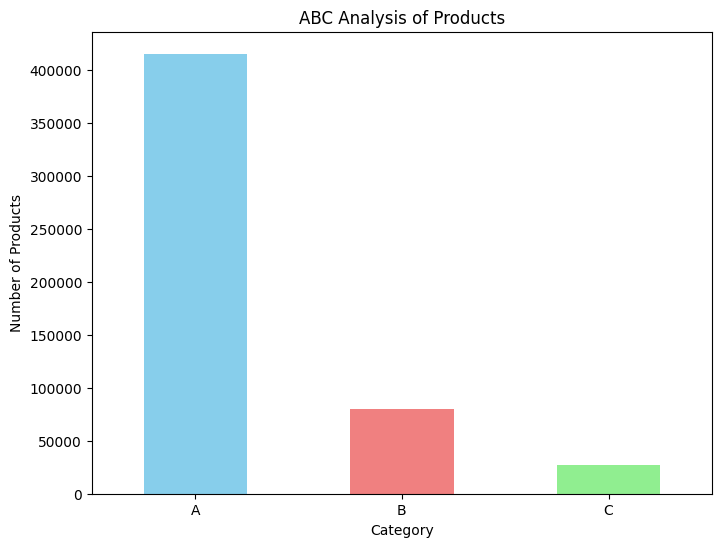

In [ ]:
# Assuming 'category_counts' is already defined as in the previous code

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('ABC Analysis of Products')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.show()

it shows that the products comes under category A genreted highest revenue than other products

# **XYZ ANALYSIS**
XYZ Analysis is a method used to group items based on how much their demand changes over time — steady, moderate, or unpredictable.

**X items**: These have very stable and regular demand, making them easy to forecast and manage.

**Y items**: These have some fluctuations in demand, often due to seasonal or occasional changes.

**Z items**: These have highly unpredictable demand, making them the hardest to manage and forecast.

In [ ]:
# prompt: create  month column
# Convert 'InvoiceDate' column to datetime objects if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month from the 'InvoiceDate' column
df['Month'] = df['InvoiceDate'].dt.month

# Display the updated DataFrame with the 'Month' column
print(df.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Revenue  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom     83.4   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom     81.0   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom     81.0   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom    100.8   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom     30.0   

   Revenue Percentage  Cumulative Revenue Percentage Category  Month  
0            0.000874                       0.000874        A     12  
1            0.0

In [ ]:
# calculate total_demand and yearly average
# Calculate total demand
total_demand = df['Quantity'].sum()
print(f"Total Demand: {total_demand}")

# Calculate yearly average demand
yearly_average_demand = df.groupby('Month')['Quantity'].mean()
print("\nYearly Average Demand:")
yearly_average_demand


Total Demand: 5494075

Yearly Average Demand:


,Quantity
Month,
1,12.301854
2,12.760891
3,12.214014
4,10.679795
5,10.491606
6,9.847041
7,9.070305
8,13.996199
9,11.471994


In [ ]:
# prompt: Calculate standard deviation in demand
std_dev_demand = df['Quantity'].std()
print(f"Standard Deviation of Demand (Quantity): {std_dev_demand}")


Standard Deviation of Demand (Quantity): 97.9059846234834


In [ ]:
# prompt: Calculate Coefficient of Variation in demand
# Calculate the coefficient of variation for demand (Quantity)
cv_demand = df['Quantity'].std() / df['Quantity'].mean()

print(f"Coefficient of Variation in Demand: {cv_demand}")


Coefficient of Variation in Demand: 9.311687201806064


In [ ]:
# Define thresholds for X, Y, and Z categories
x_threshold = 0.1
y_threshold = 0.2

# Create a new column 'DemandCategory' based on coefficient of variation
df['DemandCategory'] = 'Z'
df.loc[df['Quantity'] <= x_threshold, 'DemandCategory'] = 'X'
df.loc[(df['Quantity'] > x_threshold) & (df['Quantity'] <= y_threshold), 'DemandCategory'] = 'Y'


In [ ]:
# prompt:  Analyze the XYZ Category counts

# Calculate XYZ category counts
xyz_category_counts = df['DemandCategory'].value_counts()

# Calculate XYZ category percentages
xyz_category_percentages = (xyz_category_counts / xyz_category_counts.sum()) * 100

# Print the results
print("\nXYZ Category Counts:")
print(xyz_category_counts)
print("\nXYZ Category Percentages:")
print(xyz_category_percentages)


XYZ Category Counts:
DemandCategory
Z    512034
X     10499
Name: count, dtype: int64

XYZ Category Percentages:
DemandCategory
Z    97.990749
X     2.009251
Name: count, dtype: float64


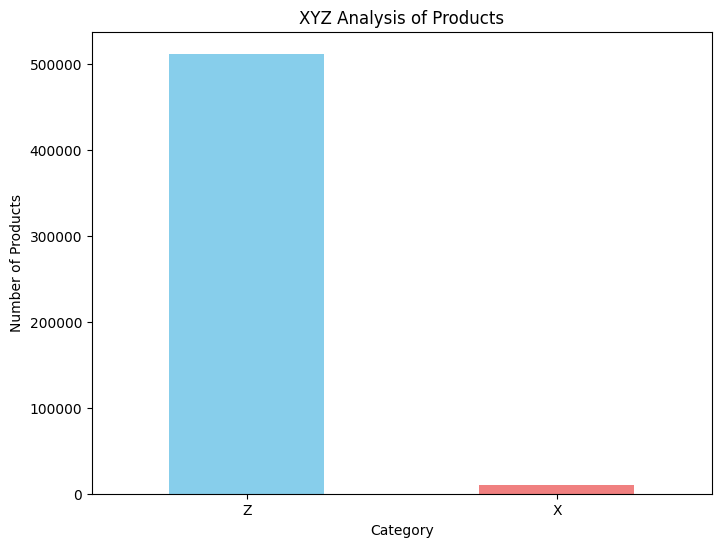

In [ ]:
# Visualization for XYZ analysis
plt.figure(figsize=(8, 6))
xyz_category_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('XYZ Analysis of Products')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Combined ABC-XYZ Analysis


# Combined ABC-XYZ Analysis
df['CombinedCategory'] = df['Category'] + df['DemandCategory']
combined_category_counts = df['CombinedCategory'].value_counts()
combined_category_percentages = (combined_category_counts / combined_category_counts.sum()) * 100

# Print the results
print("\nCombined ABC-XYZ Category Counts:")
print(combined_category_counts)
print("\nCombined ABC-XYZ Category Percentages:")
print(combined_category_percentages)




Combined ABC-XYZ Category Counts:
CombinedCategory
AZ    406432
BZ     79219
CZ     26383
AX      8867
BX      1159
CX       473
Name: count, dtype: int64

Combined ABC-XYZ Category Percentages:
CombinedCategory
AZ    77.781116
BZ    15.160574
CZ     5.049059
AX     1.696926
BX     0.221804
CX     0.090521
Name: count, dtype: float64


We combine ABC-XYZ Analysis to get a more complete view of inventory by considering both the value (ABC) and demand variability (XYZ) of items

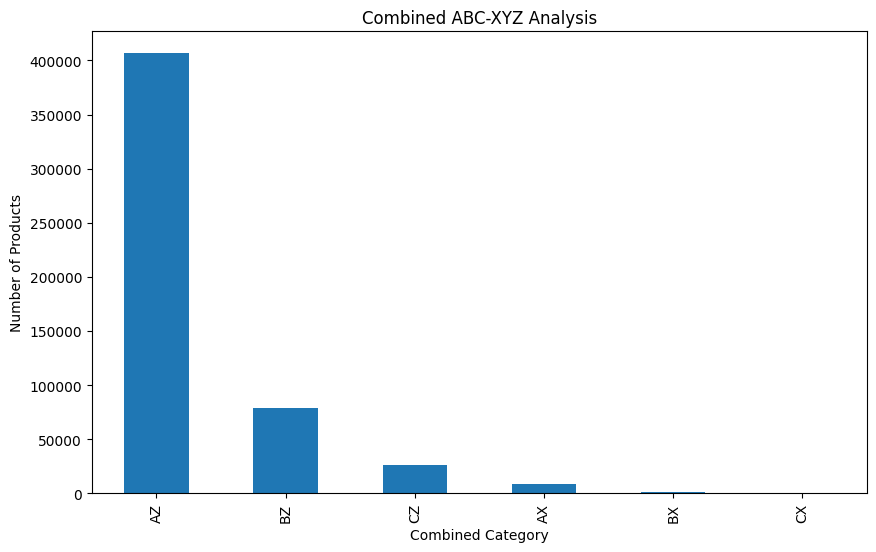

In [ ]:
# Visualization for the combined analysis
plt.figure(figsize=(10,6))
combined_category_counts.plot(kind='bar')
plt.title("Combined ABC-XYZ Analysis")
plt.xlabel('Combined Category')
plt.ylabel('Number of Products')
plt.show()

# **Multi- Criteria ABC Analysis**
Multi-Criteria ABC Analysis is an advanced inventory classification method that considers multiple factors—like revenue, quantity sold, and order frequency—to prioritize and manage stock more effectively than traditional ABC analysis.


In [ ]:
# Add the ABC classification for both Volume & Revenue
import inventorize3 as inv

data_abc_by_multi_criteria= inv.productmix(summaized_data['Description'],summaized_data['Quantity'],summaized_data['Revenue'])
data_abc_by_multi_criteria['abc_rank'] = data_abc_by_multi_criteria['comulative_revenue'].rank().astype(int)
data_abc_by_multi_criteria.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix,abc_rank
1839,REGENCY CAKESTAND 3 TIER,13093,163051.46,0.002383,0.227408,0.017092,0.017092,A,A,A_A,1
4601,WHITE HANGING HEART T-LIGHT HOLDER,57428,155825.52,0.010453,0.010453,0.016335,0.033427,A,A,A_A,2
5054,DOTCOM POSTAGE,731,116401.99,0.000133,0.921770,0.012202,0.045629,B,A,B_A,3
3092,ASSORTED COLOUR BIRD ORNAMENT,44925,72454.12,0.008177,0.045650,0.007595,0.053224,A,A,A_A,4
1422,PAPER CHAIN KIT 50'S CHRISTMAS,17083,57870.20,0.003109,0.156685,0.006066,0.059291,A,A,A_A,5


In [ ]:
# Chech the each category sku counts
data_abc_by_multi_criteria.product_mix.value_counts()

,count
product_mix,
C_C,2828
A_A,594
C_B,370
B_B,367
B_A,257
B_C,251
A_B,235
C_A,99
A_C,69


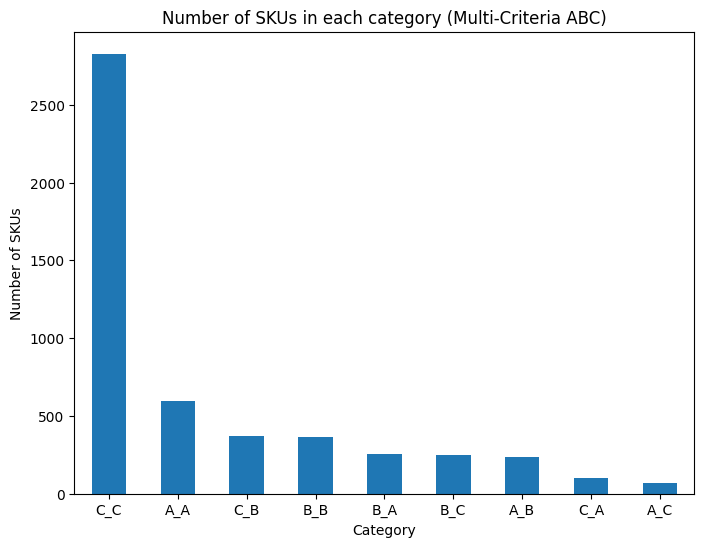

In [ ]:
# visualize how many SKUs are there in each category
plt.figure(figsize=(8, 6))
data_abc_by_multi_criteria['product_mix'].value_counts().plot(kind='bar')
plt.title('Number of SKUs in each category (Multi-Criteria ABC)')
plt.xlabel('Category')
plt.ylabel('Number of SKUs')
plt.xticks(rotation=0)
plt.show()


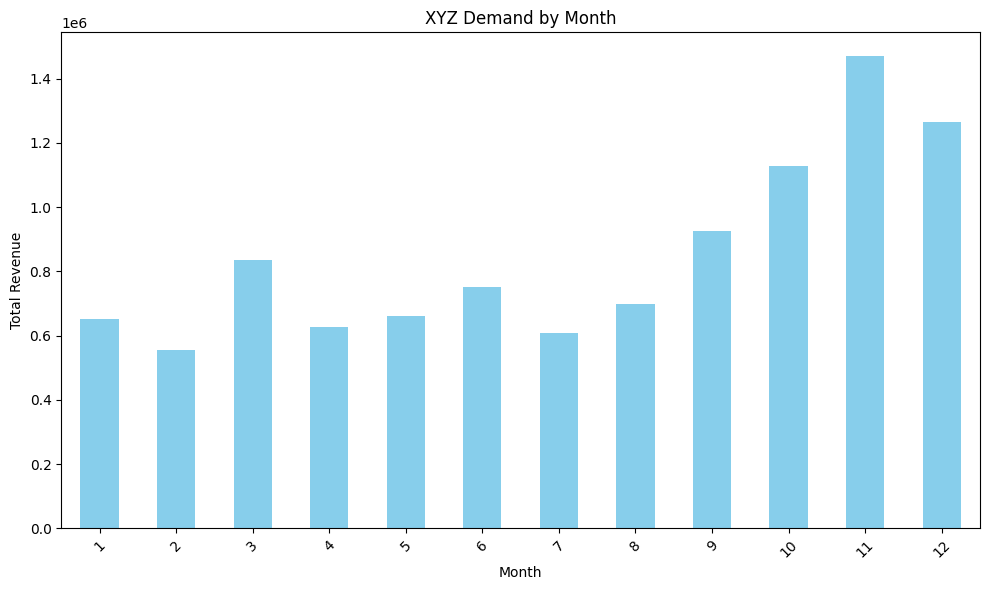

In [ ]:
# prompt: show the bar plot for xyz demand by month
# Changed 'XYZ Category' to 'DemandCategory'
xyz_monthly_revenue = df[df['DemandCategory'] == 'Z'].groupby('Month')['Revenue'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
xyz_monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('XYZ Demand by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


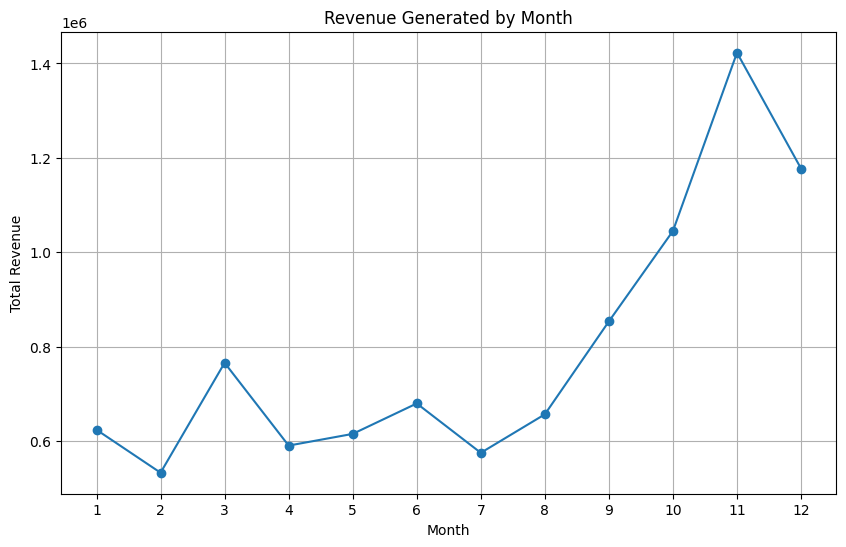

In [ ]:
# Group data by month and sum revenue
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('Revenue Generated by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(monthly_revenue.index)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522533 entries, 0 to 525460
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Invoice                        522533 non-null  object        
 1   StockCode                      522533 non-null  object        
 2   Description                    522533 non-null  object        
 3   Quantity                       522533 non-null  int64         
 4   InvoiceDate                    522533 non-null  datetime64[ns]
 5   Price                          522533 non-null  float64       
 6   Customer ID                    522533 non-null  float64       
 7   Country                        522533 non-null  object        
 8   Revenue                        522533 non-null  float64       
 9   Revenue Percentage             522533 non-null  float64       
 10  Cumulative Revenue Percentage  522533 non-null  float64       
 11  Categ